### CLASSIFICATION ALGORITHM

#### PROBELM

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

- Sepal Length
- Sepal Width
- Petal length
- Petal width


Using above 4 features you will classify a flower  in one of the three categories,
- Setosa
- Versicolour
- Virginica

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Iris dataset
iris_data = load_iris()

In [4]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
#target attribute which will give target variable, and already imported in numeric value from categorical data.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Exploration

In [7]:
df.shape

(150, 5)

In [8]:
# To get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
#To display the initial rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#To display the final rows of the DataFrame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
#To display column labels of DataFrame
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [12]:
#To display the statistical analysis for numerical columns within the DataFrame
print("\nStatistical analysis on numerical features:")
df.describe()


Statistical analysis on numerical features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### There exist outliers in the petal length column

In [13]:
#Checking is there any null value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

#### Data Preprocessing

In [14]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [15]:
df['class'].unique()

array([0, 1, 2])

In [16]:
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

### Visualization

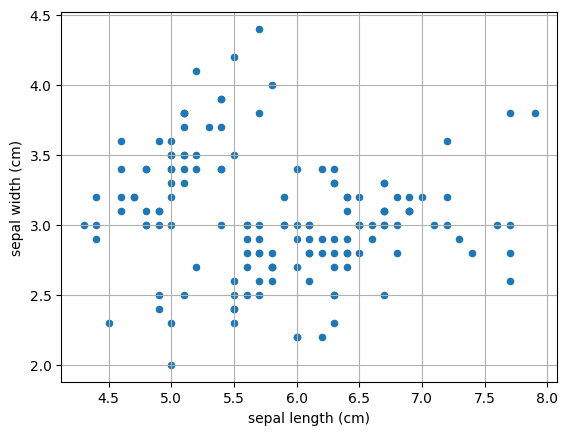

In [17]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="sepal width (cm)")
plt.grid()
plt.show()

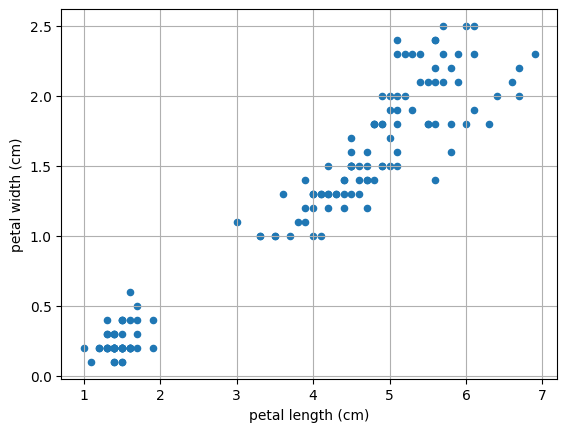

In [18]:
df.plot(kind="scatter", x= "petal length (cm)", y ="petal width (cm)")
plt.grid()
plt.show()

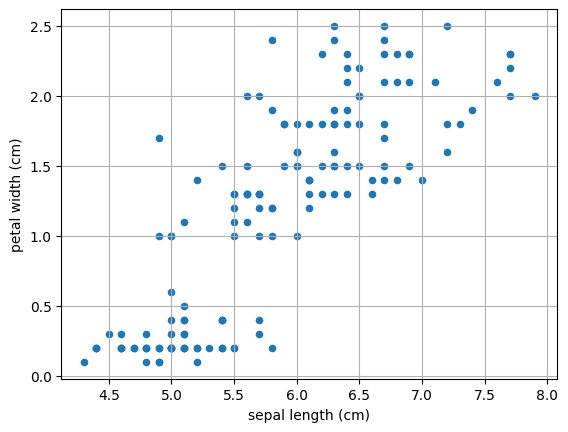

In [19]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="petal width (cm)")
plt.grid()
plt.show()

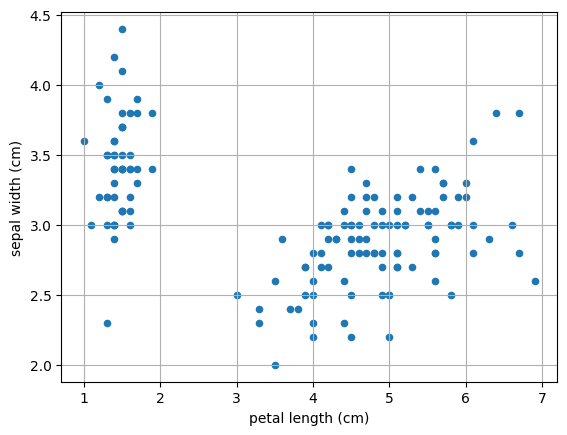

In [20]:
df.plot(kind="scatter", x= "petal length (cm)", y ="sepal width (cm)")
plt.grid()
plt.show()

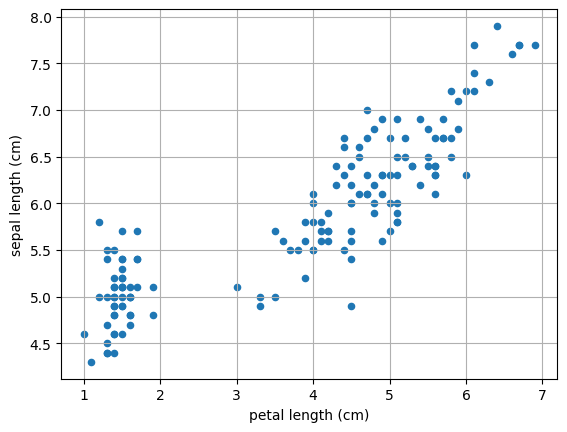

In [21]:
df.plot(kind="scatter", x= "petal length (cm)", y ="sepal length (cm)")
plt.grid()
plt.show()

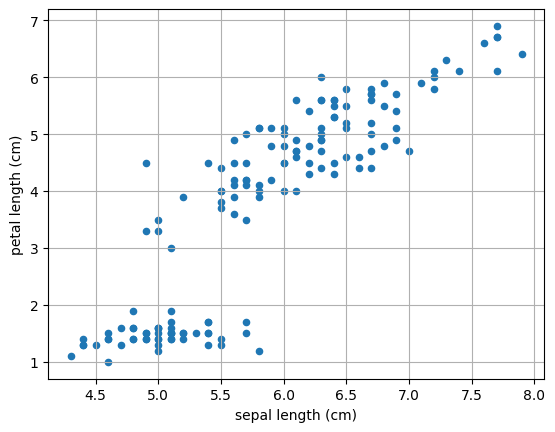

In [22]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="petal length (cm)")
plt.grid()
plt.show()

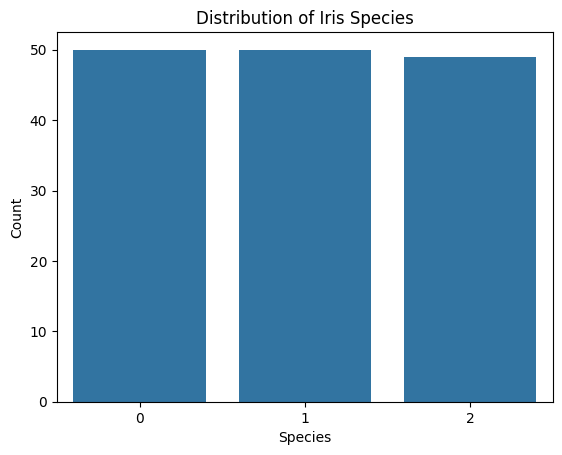

In [23]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

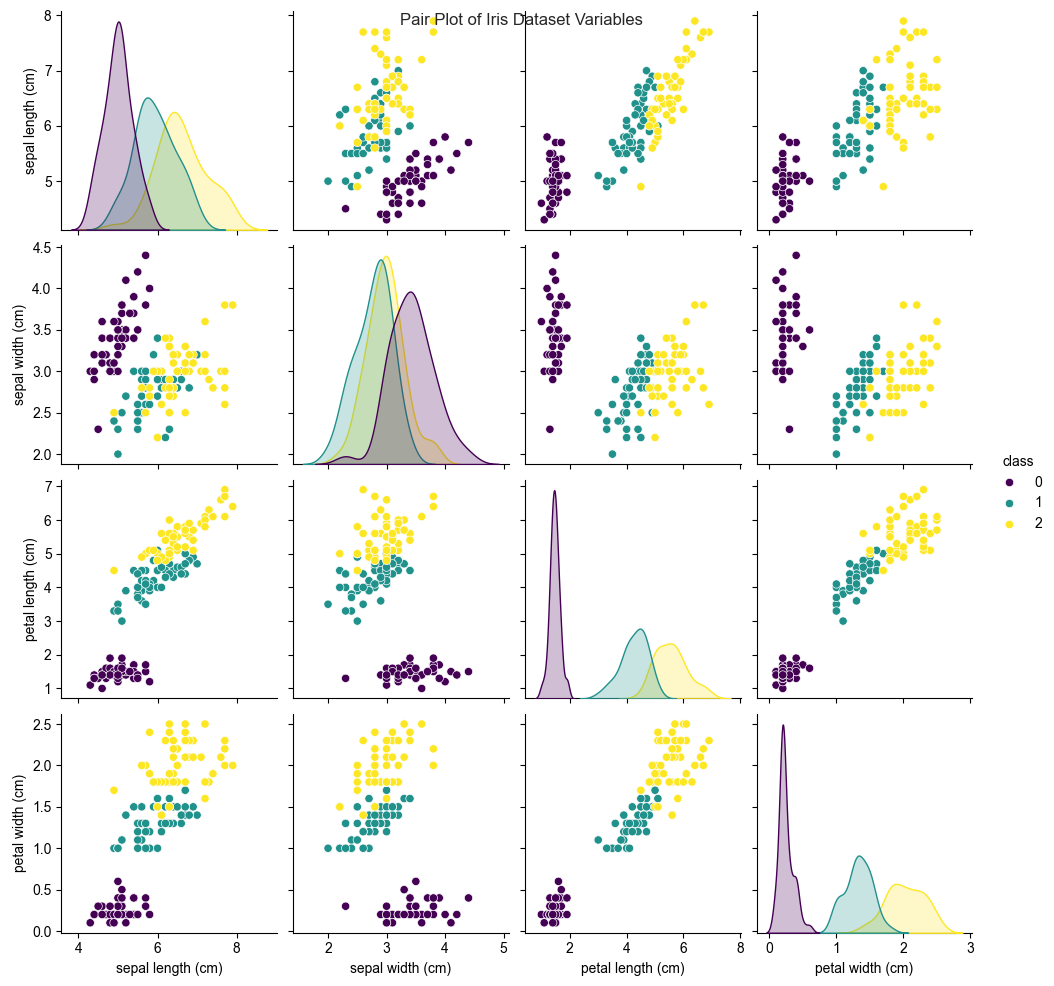

In [24]:
#create a pair plot
sns.pairplot(df,hue='class', palette='viridis')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

This provides a visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot shows the relationship between two variables, and the color of the data points indicates the species of the iris flower.

In [25]:
colname= df.select_dtypes("float64").columns
colname

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

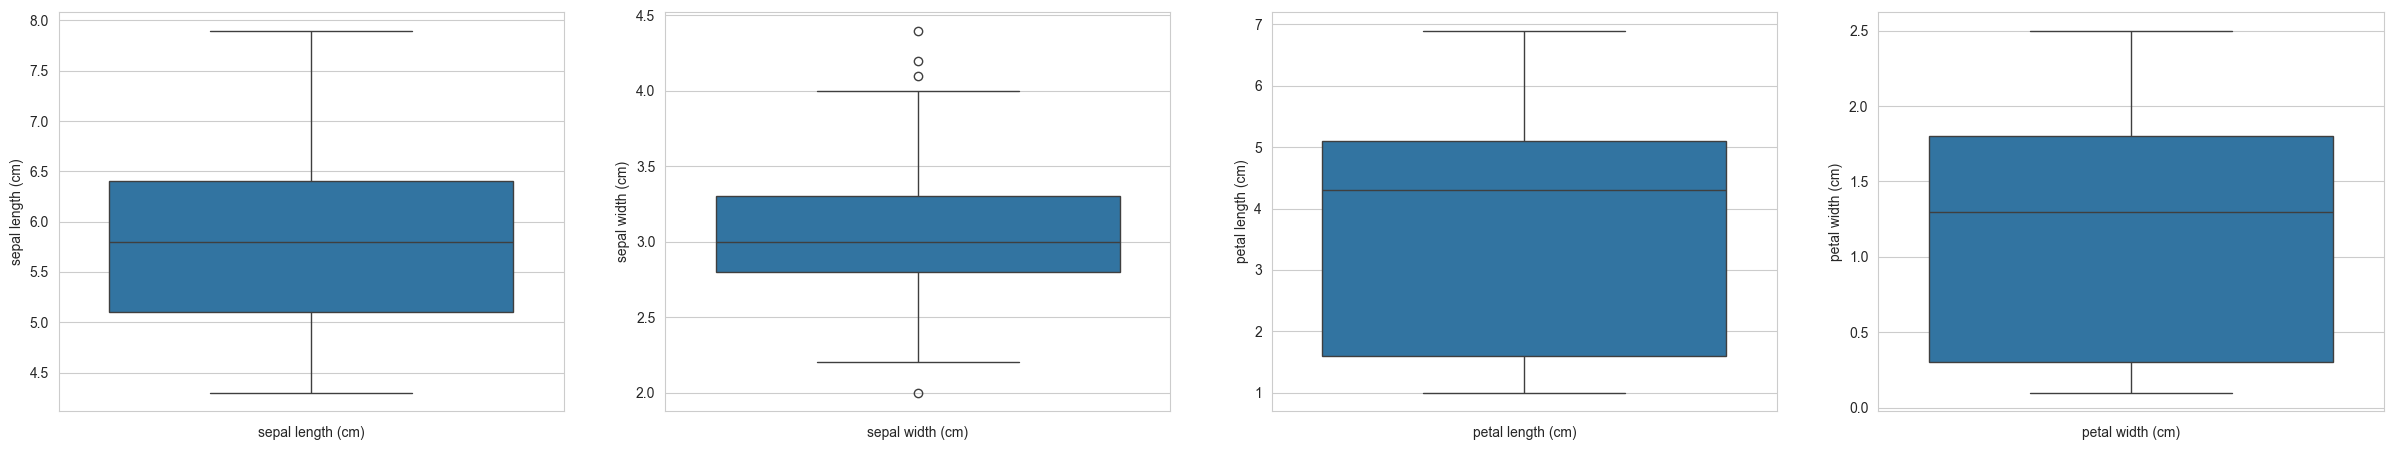

In [26]:
#box plot 
fig = plt.figure(figsize=(30,30))
counter = 0

for col in colname:
    fig.add_subplot(5,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

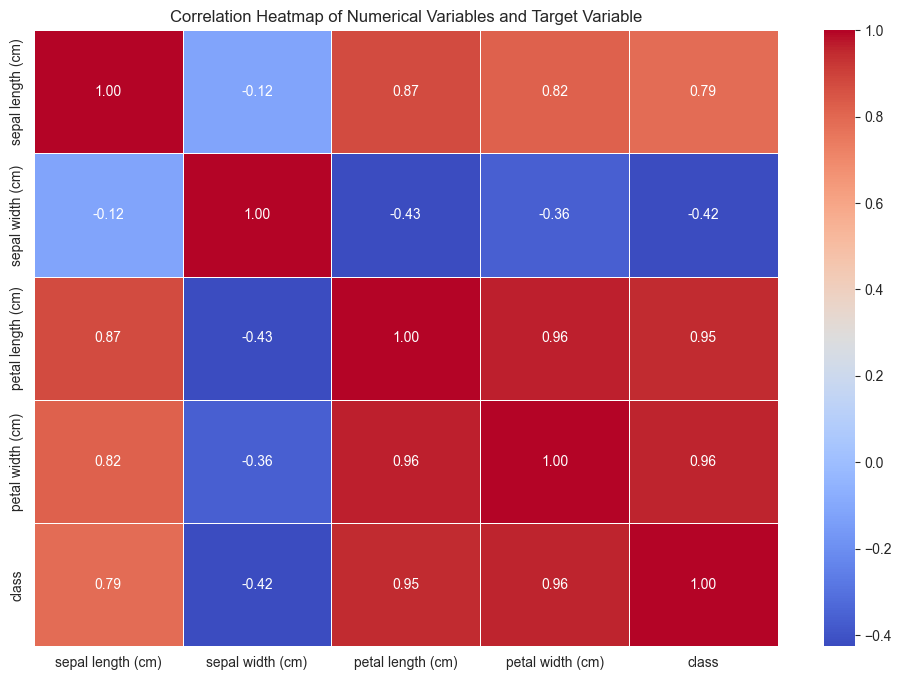

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

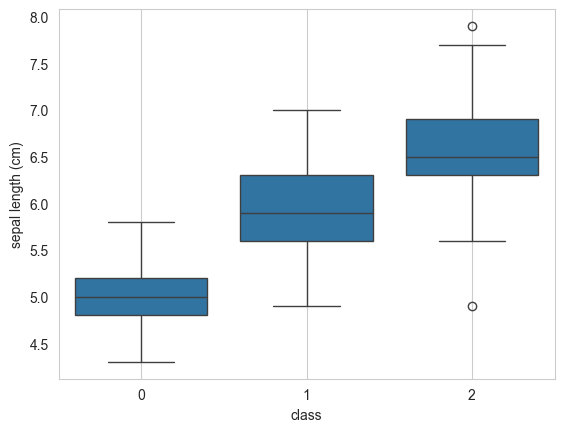

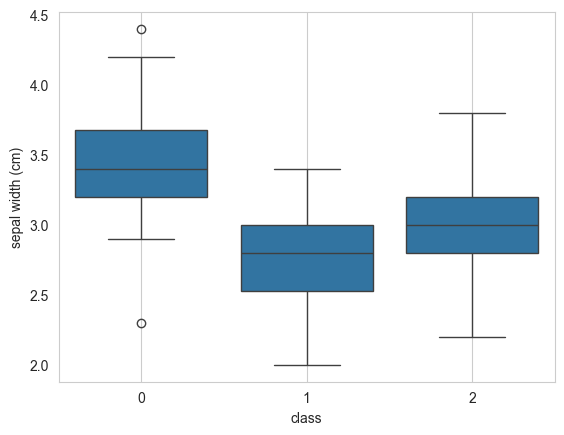

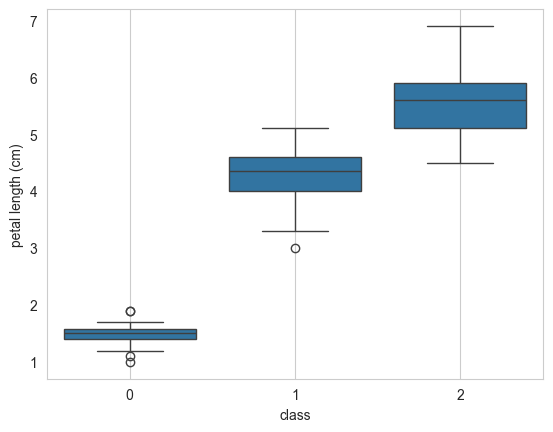

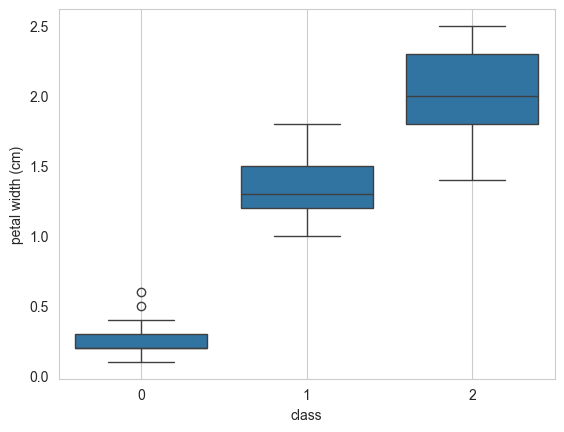

In [28]:
for col in df[colname]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

### Outlier Treatment

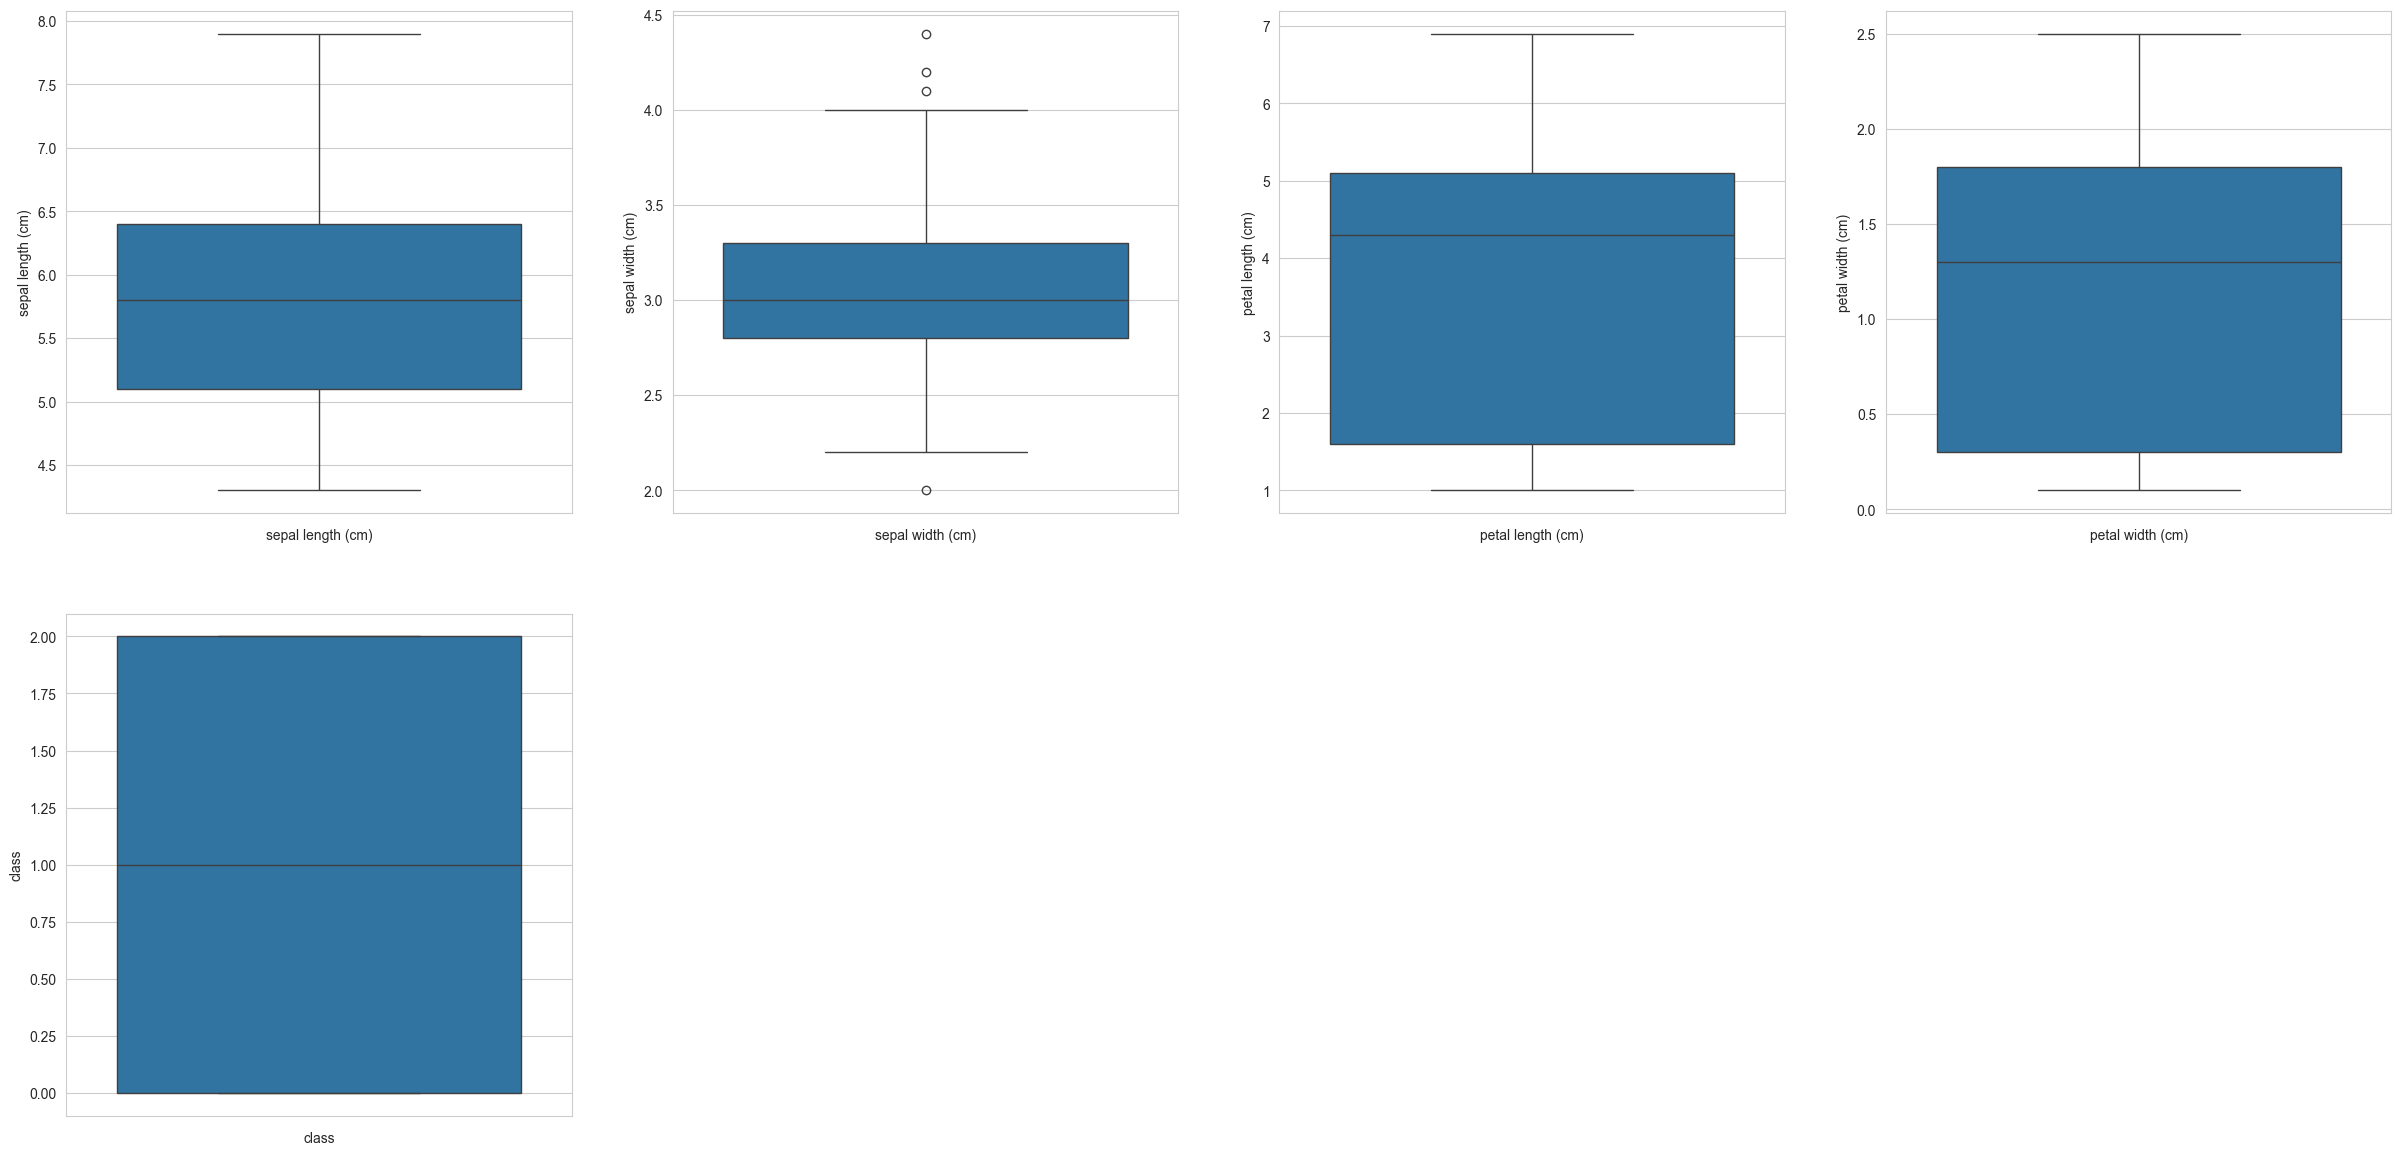

In [29]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [30]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [31]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

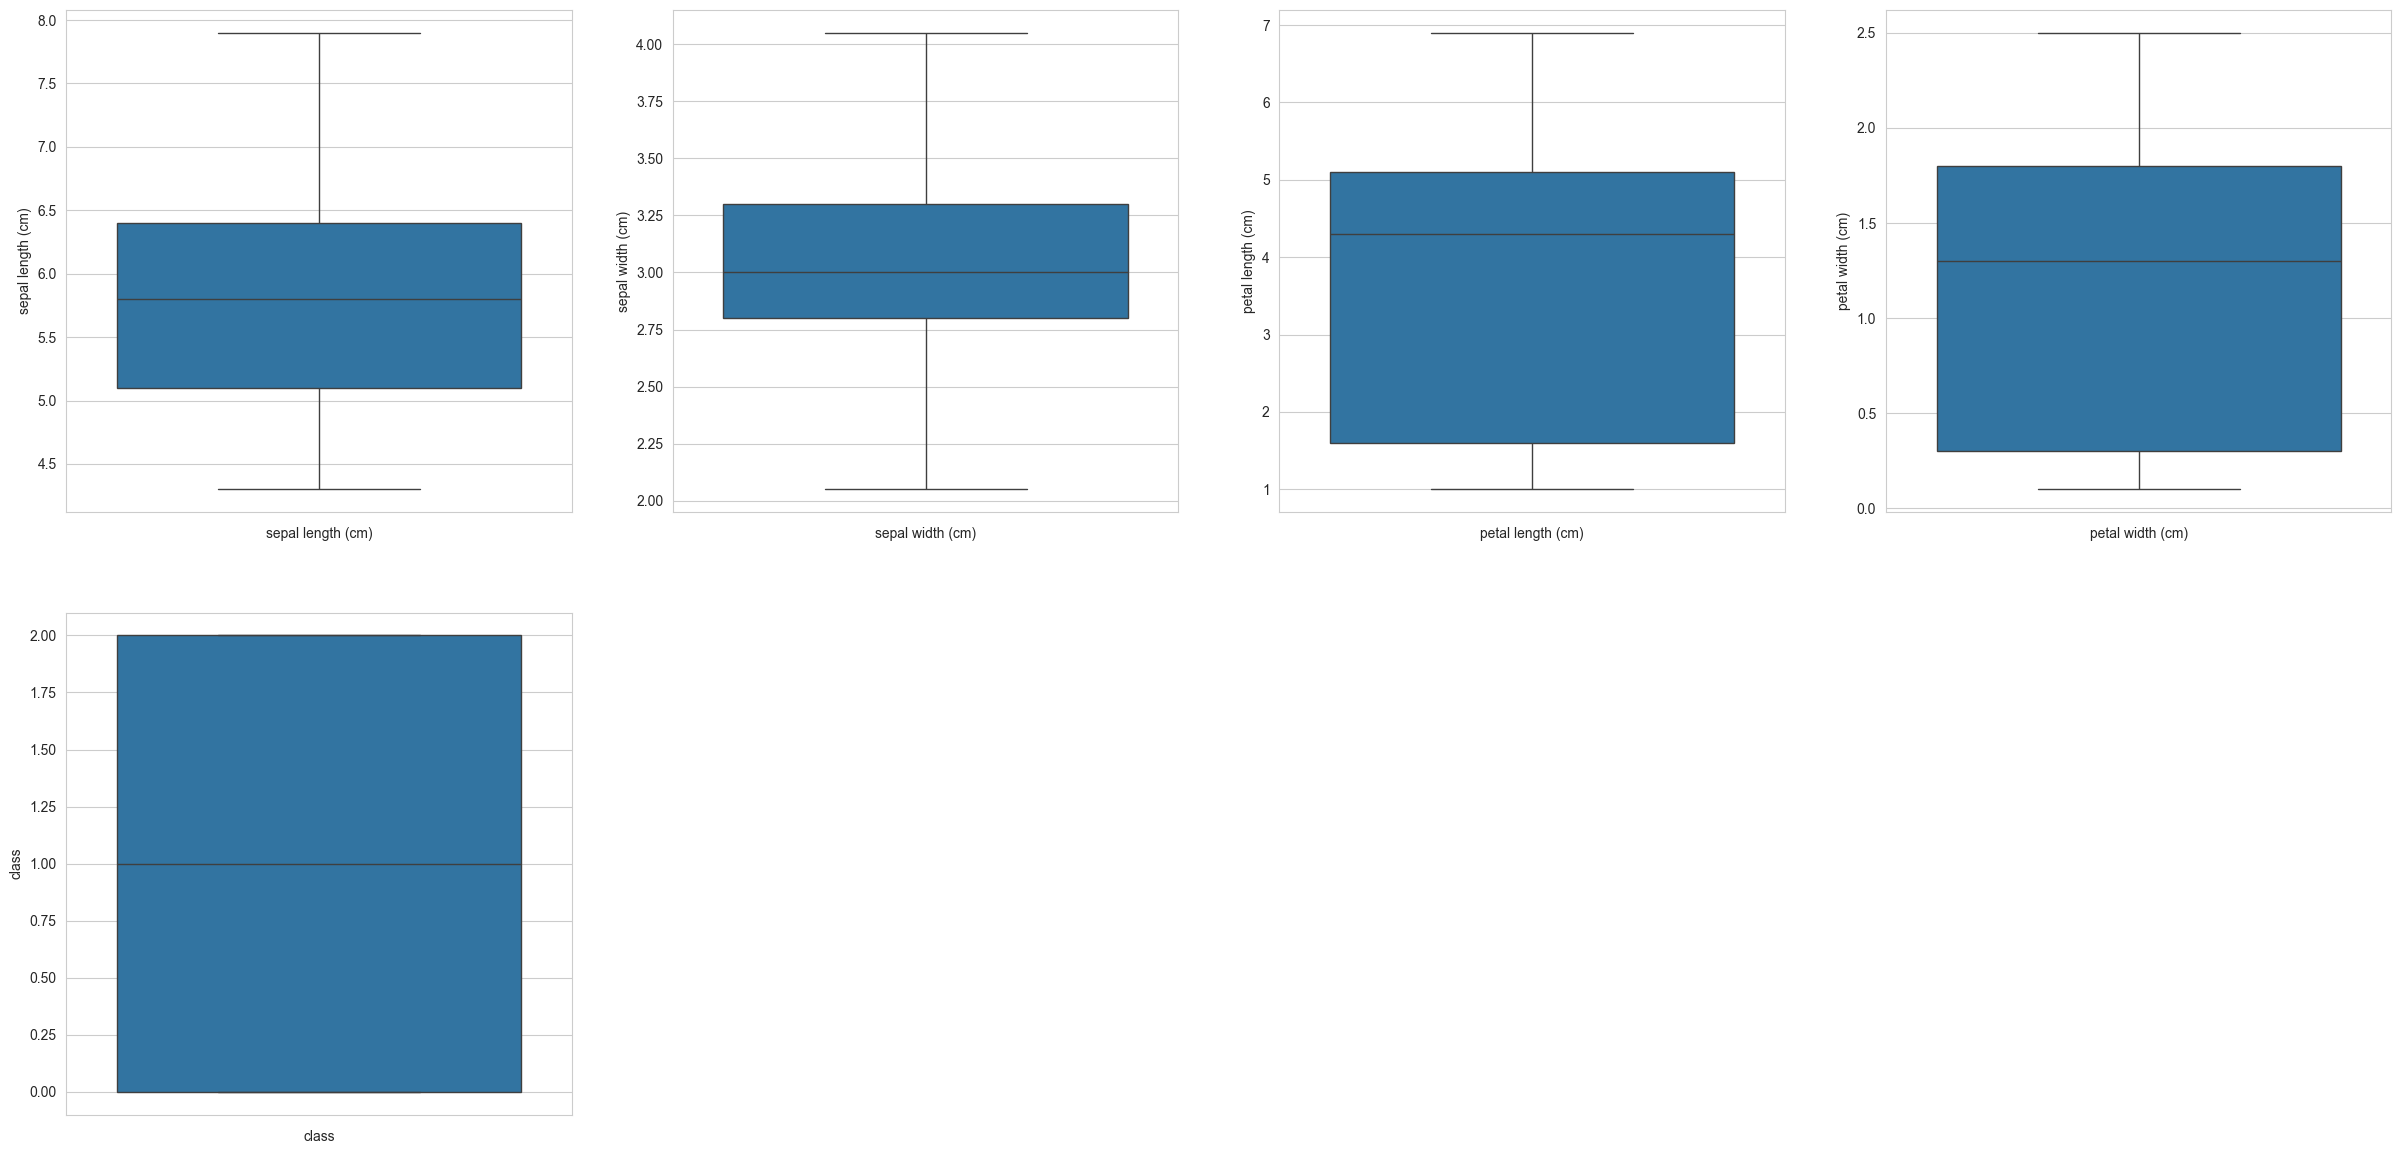

In [32]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [33]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


As we have no categorical columns, we can skip encoding process

#### Feature Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[colname])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=colname)

df[colname] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


In [35]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


### Model Building

In [36]:
x = df.drop('class', axis=1)

In [37]:
y=df['class']

In [38]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


In [39]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
Name: class, Length: 149, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

### 1.Logistics Regression

In [41]:
from sklearn.linear_model import LogisticRegression
Logistic_Model = LogisticRegression()
Logistic_Model.fit(x_train, y_train)

LogisticRegression()

In [42]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [43]:
y_PredictedLogistic = Logistic_Model.predict(x_test)
y_PredictedLogistic

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 2., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [44]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_PredictedLogistic)
cm_logistic

array([[16,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 12]], dtype=int64)

##### The element in the ith row and jth column of the matrix represents the number of instances of the actual class i that were predicted as class j.

In [45]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_logistic[0, 0]
FP = cm_logistic[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

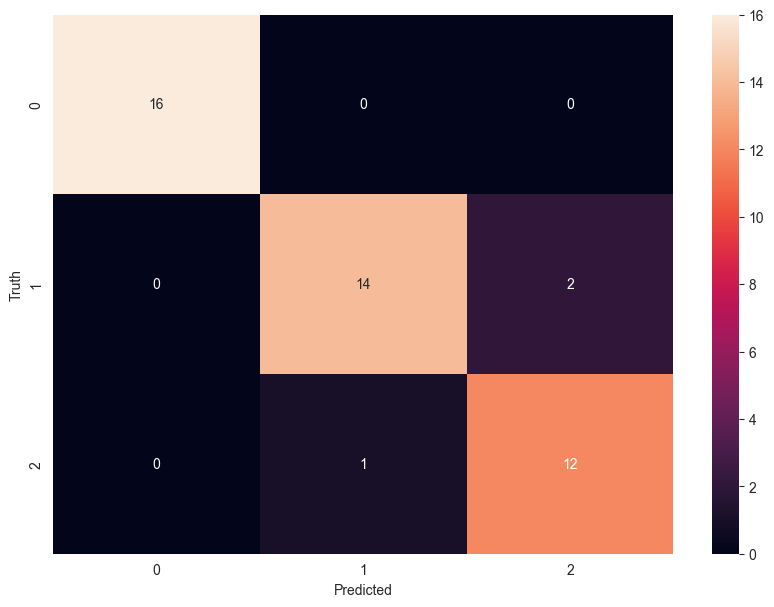

In [46]:
plt.figure(figsize = (10,7))
sns.heatmap(cm_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

The actual value of class 1 is predicted 1 correctly 14 times and predicted as  2 as wrong prediction for 2 times. Class 2 is predicted correctly 12 times and 1 wrong preidction as 1. All 0,classes are correctly classified

In [47]:
Logistic_Model.score(x_test, y_test)

0.9333333333333333

In [48]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_PredictedLogistic)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_PredictedLogistic))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.93      0.88      0.90        16
         2.0       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [50]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on test data
probslogistic = Logistic_Model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_log = roc_auc_score(y_test, probslogistic, multi_class='ovr')

print("AUC for logistic Classifier:", auc_log)

AUC for logistic Classifier: 0.9811284261715296


### 2. Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_model = DecisionTreeClassifier()
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
y_predictedDecision= decision_model.predict(x_test)
y_predictedDecision

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [54]:
decision_model.score(x_test, y_test)

0.9555555555555556

In [55]:
#confusion Matrix
cm_decision = confusion_matrix(y_test,y_predictedDecision)
cm_decision

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [56]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_decision[0, 0]
FP = cm_decision[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

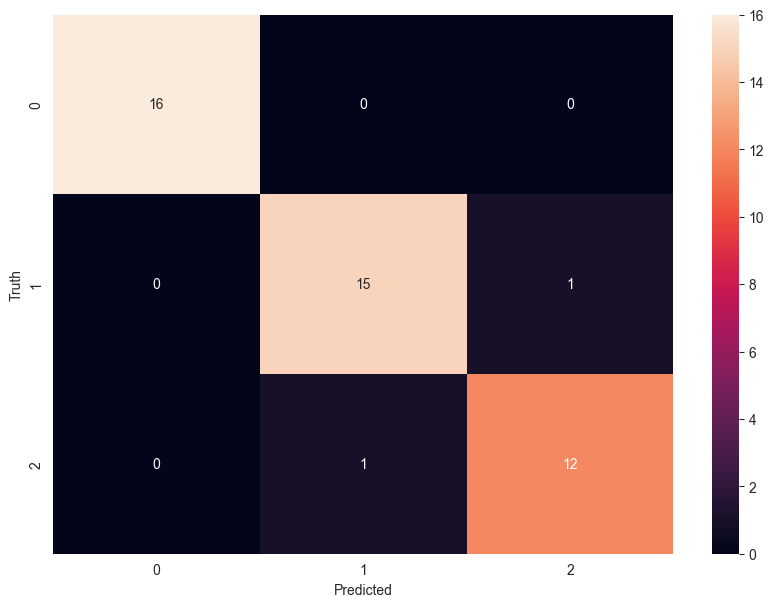

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_decision, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Actual  class 1 is predicted correctly 15 times as 1 and one wrong prediction as 2. class 2 is predicted correctly 12 times as 1 and one wrong prediction as 1. All 0's  class correctly predicted

In [58]:
decision_model.score(x_test, y_test)

0.9555555555555556

In [59]:
print(classification_report(y_test, y_predictedDecision))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



[Text(0.4, 0.9, 'x[3] <= 0.292\ngini = 0.666\nsamples = 104\nvalue = [34, 34, 36]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.2, 0.5, 'x[2] <= 0.678\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[0] <= 0.486\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 0.653\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.7, 0.3, 'x[1] <= 0.525\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

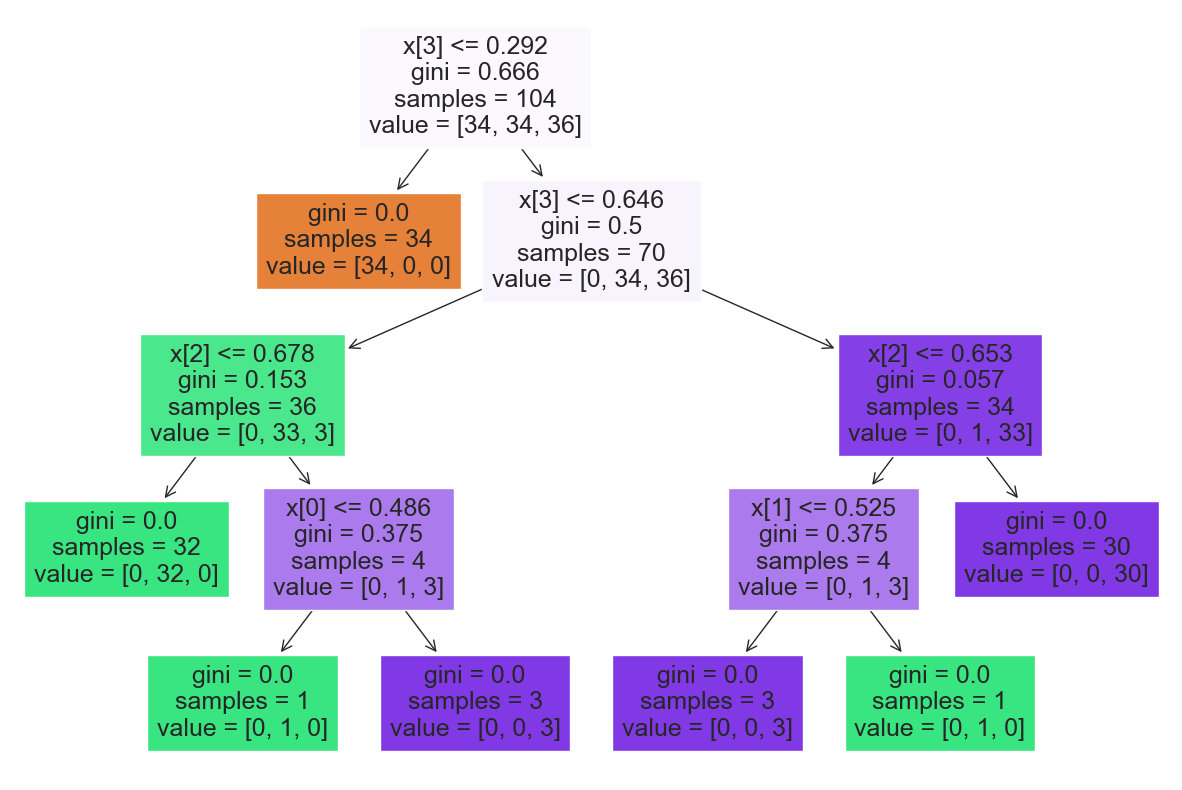

In [60]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model,filled=True)

Here x[3] represents petal width in the iris. The tree begins with a decision that feature x[3] being less than or equal to 0.8. 

36 samples belongs to 'setosa', 32 samples belongs to  'versicolor' & 37 samples belongs to 'virginica'.

If x[3] <0.8, the tree goes to the left child node, where the Gini impurity is 0.0, indicating a pure node with all samples belonging to class 0, which is 'setosa'

 If x[3] >0.8, the tree goes to the right child node, where the decision is based on x[3]<=1.65. If x[3] , 1.65, the tree goes to the left child node. where the decision is based on x[2]<=5.0 else the tree goes to the right child node based on the decision x[2]<=4.85. 
(x[2] represent petal length)


The process continues till it reached the leaf node where gini=0

#### Post Pruning
In the tree, consider the third layer x[2]<=4.85. Here out of 35 samples, 34 belongs to virginica and 1 belongs to versicolor. 
In this case, further splitting is not necessary. We can prune the tree

In [61]:
# post pruning with max_depth=2
decision_model2=DecisionTreeClassifier(max_depth=2)
decision_model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.271\ngini = 0.666\nsamples = 104\nvalue = [34, 34, 36]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.646\ngini = 0.5\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

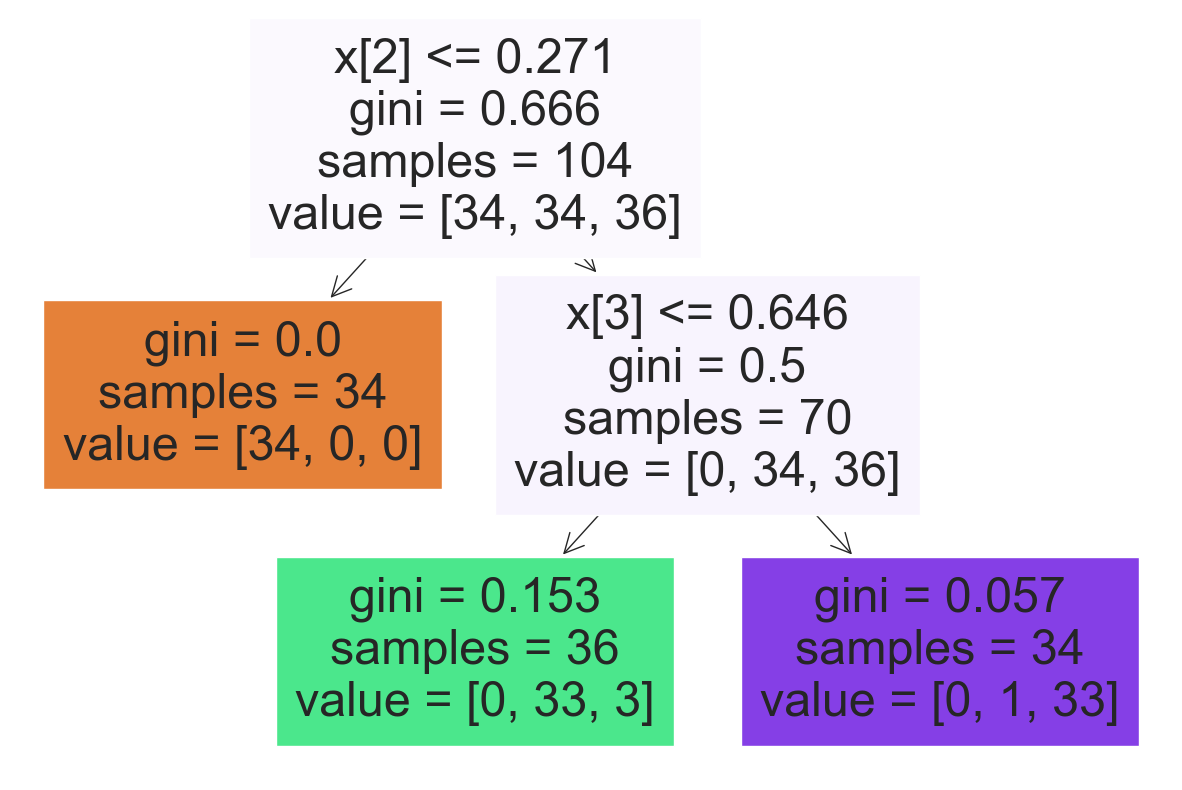

In [62]:
plt.figure(figsize=(15,10))
tree.plot_tree(decision_model2,filled=True)

In [63]:
y_predictedpruned= decision_model2.predict(x_test)
y_predictedpruned

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [64]:
print(accuracy_score(y_predictedpruned,y_test))

0.9555555555555556


In [65]:
#Finding best model using ccp_alpha
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define a function to train decision tree classifiers with pruning
def train_decision_tree_pruning(x_train, y_train, x_test, y_test):
    model = DecisionTreeClassifier()
    # Compute the complexity pruning path for the decision tree model based on the training data
    path = model.cost_complexity_pruning_path(x_train, y_train)
    # Extract effective alphas for pruning the decision tree
    ccp_alphas = path.ccp_alphas

    # Initialize empty lists to store trained models and their accuracies
    clfs = []
    accuracy = []

     # Loop through each value of ccp_alpha
    for ccp_alpha in ccp_alphas:
        # Instantiate a DecisionTreeClassifier with the current ccp_alpha
        clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf.fit(x_train, y_train)
        # Append the trained model to the list of classifiers
        clfs.append(clf)
        pred = clf.predict(x_test)
        # Calculate accuracy and append it to the accuracy list
        accuracy.append(accuracy_score(y_test, pred))

    return path,ccp_alphas,clfs, accuracy

path,ccp_alphas,clfs, accuracy = train_decision_tree_pruning(x_train, y_train, x_test, y_test)

print(path)
print(ccp_alphas)
print(clfs)
print(accuracy)

{'ccp_alphas': array([0.        , 0.00933258, 0.01442308, 0.03846154, 0.26471396,
       0.33015638]), 'impurities': array([0.        , 0.01866516, 0.03308824, 0.07154977, 0.33626374,
       0.66642012])}
[0.         0.00933258 0.01442308 0.03846154 0.26471396 0.33015638]
[DecisionTreeClassifier(random_state=0), DecisionTreeClassifier(ccp_alpha=0.00933257918552036, random_state=0), DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0), DecisionTreeClassifier(ccp_alpha=0.038461538461538464, random_state=0), DecisionTreeClassifier(ccp_alpha=0.2647139625080801, random_state=0), DecisionTreeClassifier(ccp_alpha=0.3301563820794591, random_state=0)]
[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.6444444444444445, 0.28888888888888886]


In [66]:
best_alpha_index = accuracy.index(max(accuracy))
best_alpha = ccp_alphas[best_alpha_index]
best_model = clfs[best_alpha_index]

print("Best Alpha:", best_alpha)
print("Best Model:", best_model)
print("Accuracy with Best Model:", accuracy[best_alpha_index])

Best Alpha: 0.014423076923076924
Best Model: DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)
Accuracy with Best Model: 0.9777777777777777


In [67]:
decision_modelalpha=DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)
decision_modelalpha.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.014423076923076924, random_state=0)

In [68]:
y_predalpha=decision_modelalpha.predict(x_test)
y_predalpha

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 2., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [69]:
#confusion Matrix
cm_bestccp = confusion_matrix(y_test,y_predalpha)
cm_bestccp

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 13]], dtype=int64)

In [70]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestccp[0, 0]
FP = cm_bestccp[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [71]:
print(classification_report(y_test, y_predalpha))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [72]:
# Predict probabilities on test data
probs_tree = decision_modelalpha.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9893622900088417


In [73]:
#bestmodel using GridSearchCV
decision_model3=DecisionTreeClassifier()

In [74]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [75]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(decision_model3,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [76]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [77]:
y_pred3=cv.predict(x_test)
y_pred3

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 2., 2., 0., 2., 2., 0., 1., 0., 1., 2., 1., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [78]:
print(accuracy_score(y_pred3,y_test))

0.9555555555555556


In [79]:
best_modelgrid=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features='sqrt', splitter='best')
best_modelgrid.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt')

In [80]:
y_predictedbest=best_modelgrid.predict(x_test)

In [81]:
#confusion Matrix
cm_bestgrid = confusion_matrix(y_test,y_predictedbest)
cm_bestgrid

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 13]], dtype=int64)

In [82]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_bestgrid[0, 0]
FP = cm_bestgrid[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


In [119]:
accuracy = accuracy_score(y_test, y_predictedbest)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [83]:
print(classification_report(y_test, y_predictedbest))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      0.94      0.97        16
         2.0       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [84]:
# Predict probabilities on test data
probs_tree = best_modelgrid.predict_proba(x_test)  

# Calculate AUC for classifier
auc_decision = roc_auc_score(y_test, probs_tree, multi_class='ovr')

print("AUC for decision Classifier:", auc_decision  )

AUC for decision Classifier: 0.9828553271441202


### 3. Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

By default, n_estimators = 100 . ie, 100 number of trees in the forest.

In [87]:
y_predictedrf = rf_model.predict(x_test)
y_predictedrf

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [88]:
print(accuracy_score(y_test,y_predictedrf))

0.9555555555555556


In [89]:
cm_random = confusion_matrix(y_test, y_predictedrf)
cm_random

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [90]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_random[0, 0]
FP = cm_random[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

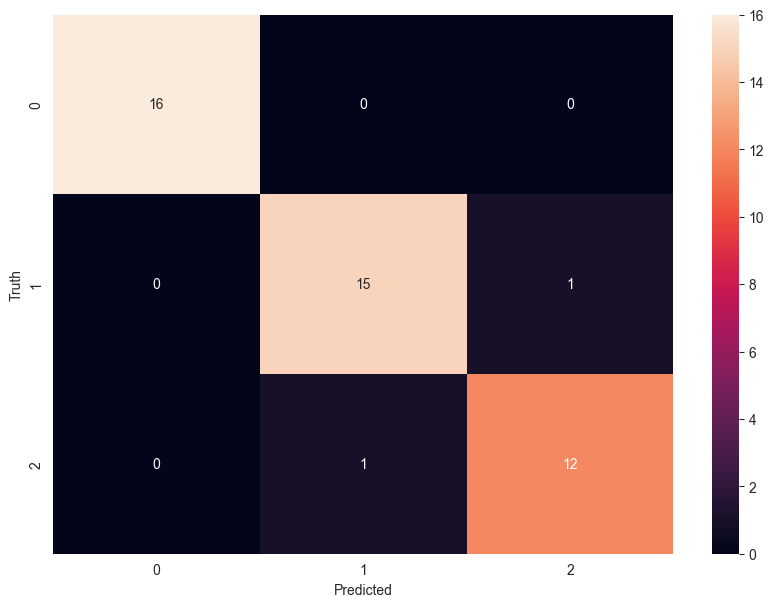

In [91]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_random, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Actual 1 is predicted correctly 15 times as 1 and one wrong prediction as 2. At the same time, 2 is predicted correctly 12 times as 2 and one wrong prediction as 1. All 0 class correctly predicted

In [92]:
rf_model.score(x_test, y_test)

0.9555555555555556

In [93]:
accuracy = accuracy_score(y_test, y_predictedrf)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [94]:
print(classification_report(y_test,y_predictedrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [123]:
# Predict probabilities on test data
probsrf = rf_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_rf = roc_auc_score(y_test, probsrf, multi_class='ovr')

print("AUC for Random Forest Classifier:", auc_rf)

AUC for Random Forest Classifier: 0.9883675950486296


#### 4. K Nearest Neighbour(KNN) Algorithm

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [98]:
y_predictedknn = KNN_model.predict(x_test)
y_predictedknn

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [99]:
print(accuracy_score(y_test,y_predictedknn))

0.9555555555555556


In [100]:
cm_knn = confusion_matrix(y_test, y_predictedknn)
cm_knn

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [101]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_knn[0, 0]
FP = cm_knn[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

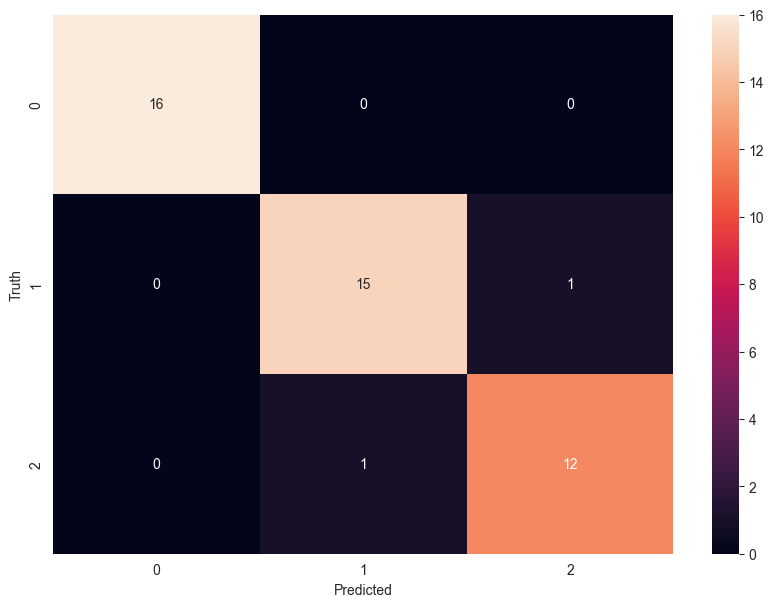

In [102]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Actual 1 is predicted correctly 18 times as 1 and one wrong prediction as 2. All 0's and 2's  class are correctly predicted

In [103]:
KNN_model.score(x_test, y_test)

0.9555555555555556

In [104]:
accuracy = accuracy_score(y_test, y_predictedknn)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [105]:
print(classification_report(y_test,y_predictedknn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [121]:
# Predict probabilities on test data
probsknn =KNN_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_knn = roc_auc_score(y_test, probsknn, multi_class='ovr')

print("AUC for KNN Classifier:", auc_knn)

AUC for KNN Classifier: 0.9977204907161803


#### 5. Naive Baye's Algorithm

In [107]:
from sklearn.naive_bayes import GaussianNB

In [108]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [109]:
y_predictedNB = NB_model.predict(x_test)
y_predictedNB

array([2., 1., 1., 2., 1., 2., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 2., 0., 2., 2., 0., 1., 0., 1., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 0., 2., 2., 1., 1., 0., 0.])

In [110]:
print(accuracy_score(y_test,y_predictedNB))

0.9555555555555556


In [111]:
cm_nb = confusion_matrix(y_test, y_predictedknn)
cm_nb

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  1, 12]], dtype=int64)

In [112]:
# Calculate True Negatives (TN) and False Positives (FP)
TN = cm_nb[0, 0]
FP = cm_nb[0, 1]

# Calculate specificity
specificity = TN / (TN + FP)

print("Specificity:", specificity)

Specificity: 1.0


Text(95.72222222222221, 0.5, 'Truth')

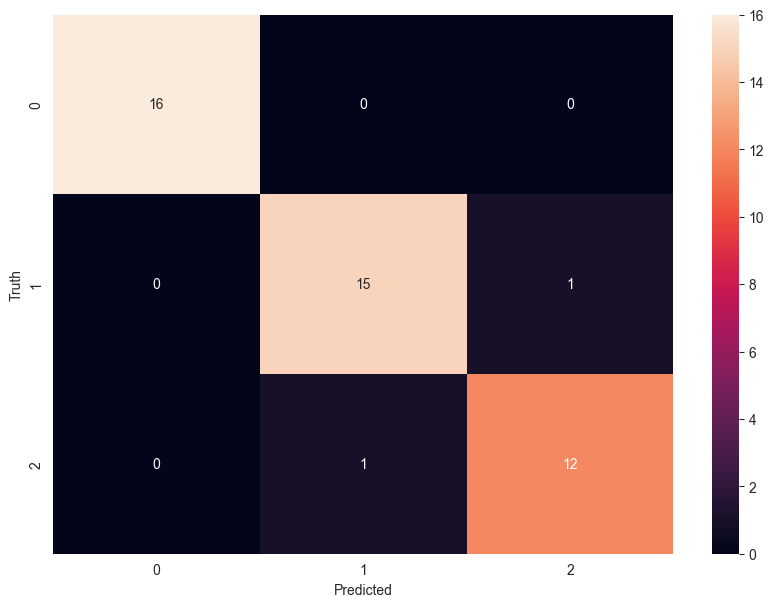

In [113]:
plt.figure(figsize = (10,7))
sn.heatmap(cm_nb, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Actual 1 is predicted correctly 18 times as 1 and one wrong prediction as 2. All 0's and 2's  class are correctly predicted

In [114]:
NB_model.score(x_test, y_test)

0.9555555555555556

In [115]:
accuracy = accuracy_score(y_test, y_predictedNB)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


In [116]:
print(classification_report(y_test,y_predictedNB))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       0.94      0.94      0.94        16
         2.0       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [120]:
# Predict probabilities on test data
probsnb =NB_model.predict_proba(x_test)  

# Calculate AUC for classifier
auc_nb = roc_auc_score(y_test, probsnb, multi_class='ovr')

print("AUC for Naive Baye's Classifier:", auc_nb)

AUC for Naive Baye's Classifier: 0.993921308576481


### CONCLUSION

Based on the provided information, here are the conclusions for each classification algorithm:

- Logistic Regression:
Accuracy: 93.33%
Specificity: 100%
Precision, recall, and F1-score are reasonably high for all classes.
AUC: 0.981
Logistic Regression performs well, with high specificity and good overall performance across precision, recall, and F1-score metrics.

- Decision Tree Classifier:
Accuracy: 97.78%
Precision, recall, and F1-score are high for all classes.
AUC: 0.983
Decision Tree Classifier demonstrates excellent performance across all metrics, with high accuracy and good precision, recall, and F1-score for each class.

- Random Forest Classifier:
Accuracy: 95.56%
Precision, recall, and F1-score are high for all classes.
AUC: 0.988
Random Forest Classifier performs well, showing high accuracy and good performance across precision, recall, and F1-score metrics for each class.

- K Nearest Neighbors (KNN) Algorithm:
Accuracy: 95.56%
Precision, recall, and F1-score are high for all classes.
AUC: 0.998
KNN Algorithm achieves high accuracy and good performance across precision, recall, and F1-score metrics for each class, with a particularly high AUC.

- Naive Bayes Algorithm:
Accuracy: 95.56%
Precision, recall, and F1-score are high for all classes.
AUC: 0.994
Naive Bayes Classifier also performs well, with high accuracy and good performance across precision, recall, and F1-score metrics for each class.fic requirements and trade-offs.

After reviewing the performance of each classification algorithm on the Iris dataset, it's evident that all models achieved high accuracy, with most surpassing 95%. The specificity of all models is particularly impressive, indicating their ability to correctly identify negative cases.

While all models performed well, there are slight variations in their performance metrics. The Decision Tree Classifier and the K Nearest Neighbors (KNN) Algorithm achieved the highest accuracy, precision, recall, and F1-score among the models, with the KNN Algorithm exhibiting an exceptionally high area under the curve (AUC).

Considering the overall performance, including accuracy, specificity, and AUC, it can be concluded that the KNN Algorithm might be the most suitable choice for the Iris dataset. However, the Decision Tree Classifier also demonstrates strong performance and could be considered as an alternative, especially if interpretability is a priority.

In summary, the KNN Algorithm and the Decision Tree Classifier are the top-performing models for the Iris dataset, with the KNN Algorithm slightly edging out due to its higher AUC.